In [1]:
!wget https://github.com/leekyuyoung20230313/pythone/raw/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy -O data.npy

--2023-05-22 04:18:49--  https://github.com/leekyuyoung20230313/pythone/raw/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy [following]
--2023-05-22 04:18:50--  https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3000128 (2.9M) [application/octet-stream]
Saving to: ‘data.npy’

data.npy            100%[===================>]   2.86

In [2]:
import numpy as np
data = np.load('data.npy')

In [3]:
from sklearn.decomposition import PCA

In [4]:
# 10000개의 성분을 50개로 축소
data_2dim = data.reshape(-1,10000)
pca =  PCA(n_components = 50)
pca.fit(data_2dim)

PCA(n_components=50)

In [7]:
data_2dim.shape, pca.components_.shape

((300, 10000), (50, 10000))

In [9]:
component_data = pca.components_.reshape(-1,100,100)

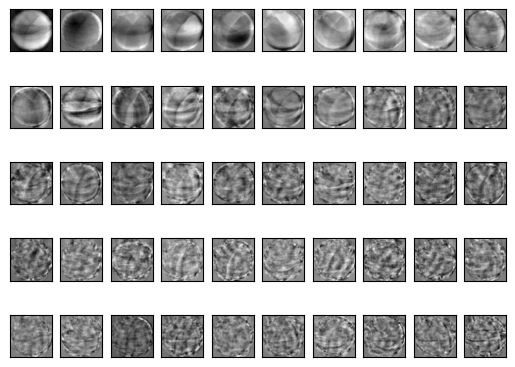

In [13]:
import matplotlib.pyplot as plt
for idx, img in enumerate(component_data):
  plt.subplot(5,10,idx+1)
  plt.imshow(img,cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
plt.show() 

In [14]:
data_pca = pca.transform(data_2dim)

In [16]:
data_pca.shape

(300, 50)

In [17]:
pca.inverse_transform(data_pca).shape

(300, 10000)

In [19]:
# Explained Variance 설명된분산
# PCA에서 각 주성분이 데이터의 변동을 얼마나 잘 설명하는지 나타내는 지표 

In [22]:
np.sum(pca.explained_variance_ratio_)

0.9215154613516764

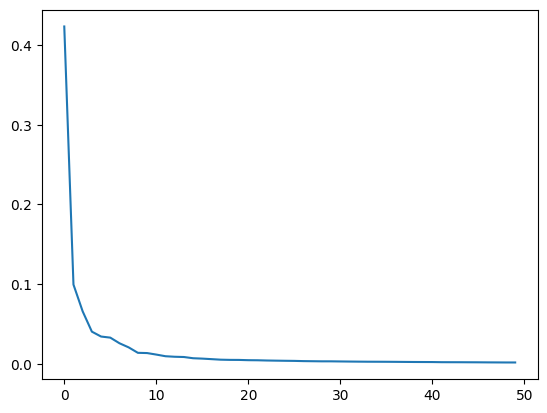

In [23]:
plt.plot(pca.explained_variance_ratio_)

In [24]:
# 분류기와 함께 사용

In [25]:
# 데이터는 비 지도 학습
from sklearn.linear_model import LogisticRegression  # 지도학습
target = np.array([0]*100+[1]*100+[2]*100)


In [27]:
# 교차검증
from sklearn.model_selection import cross_validate
score = cross_validate(LogisticRegression(), data_2dim,target)
np.mean( score['fit_time']), np.mean( score['test_score'])

(2.237094211578369, 0.9966666666666667)

In [28]:
score = cross_validate(LogisticRegression(), data_pca, target)
np.mean( score['fit_time']), np.mean( score['test_score'])

(0.020966053009033203, 1.0)

In [29]:
pca = PCA(n_components=0.5)
pca.fit(data_2dim)
pca.n_components_

2

In [30]:
data_pca =  pca.transform(data_2dim)
data_pca.shape

(300, 2)

In [32]:
from sklearn.preprocessing import StandardScaler
data_pca_scaled = StandardScaler().fit_transform(data_pca)
score = cross_validate(LogisticRegression(), data_pca_scaled, target)
np.mean( score['fit_time']), np.mean( score['test_score'])

(0.007491540908813476, 0.9866666666666667)

In [33]:
# 데이터의 차수가 10000 --> 2 
data_pca_scaled.shape

(300, 2)

In [35]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=100)
km.fit(data_pca_scaled)
np.unique(km.labels_,return_counts=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([ 92,  98, 110]))

In [36]:
# Kmeans 일 분류한 라벨이 0인 이미지들
def showKmeansClustImg(label = 0):
  data_len = len(data[km.labels_ == label])
  rowcol = int(np.round(np.sqrt(data_len)))
  print(rowcol)
  for idx, img in enumerate(data[km.labels_ == label]):
    plt.subplot(rowcol,rowcol,idx+1)
    plt.imshow(img,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
  plt.show()  

10


ValueError: ignored

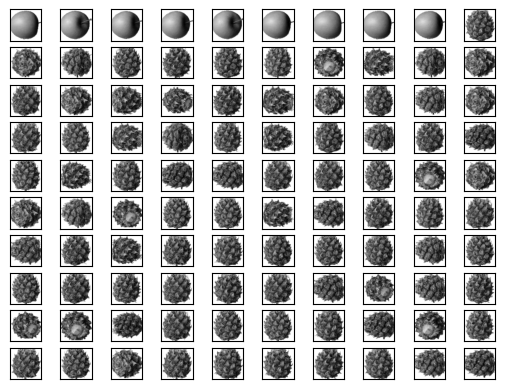

In [39]:
showKmeansClustImg(2)

차원축소
  - 중요특성을 기준으로 축소를 했기때문에.
  - 학습속도 증가
  - 노이즈제거
  - 정확성 향상
  - 다차원은 시각으로 표현하기 어려움.. 2차원으로 줄이면 시각적 표현이 자유롭다.(형태를 파악하기 쉬움)

In [40]:
data_pca_scaled.shape

(300, 2)

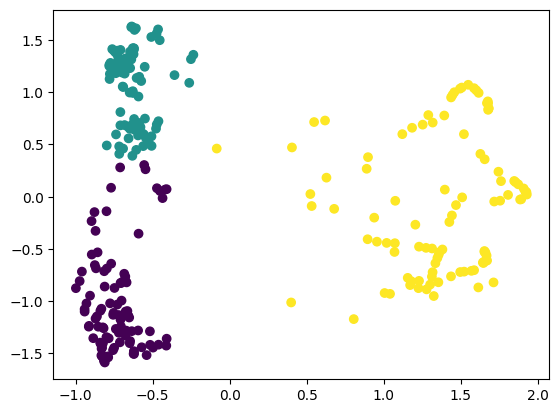

In [42]:
plt.scatter(data_pca_scaled[:,0],data_pca_scaled[:,1],c=target)

In [43]:
# iris 데이터에 적용해서 실습한것처럼 분류기를 이용해서 분류하고
from sklearn.datasets import load_iris

In [45]:
iris = load_iris()
X = iris.data
y = iris.target

In [47]:
pca = PCA(n_components=0.5)
pca.fit(X)

PCA(n_components=0.5)

In [49]:
pca.n_components_

1

In [50]:
X_pca = pca.fit_transform(X)
X_pca.shape

(150, 1)

In [51]:
score = cross_validate(LogisticRegression(),X_pca,y)

In [53]:
np.mean(score['fit_time']),np.mean(score['test_score'])

(0.011746692657470702, 0.9333333333333333)